In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from utils import *
from data import MnistTF
from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# session settings
session = create_session(gpu_id='0')
# seed settings
set_rand_seed(0)

In [4]:
try_reg2 = False
if try_reg2:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-10,10,5000, dtype=np.float32)[:, np.newaxis]
    np.random.shuffle(X_data)
    noise = np.random.normal(0, 10, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    input_dims = X_train.shape[1]
    col_0 = SoftenedNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=256,activation_fn=tf.nn.relu)
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=1,activation_fn=None)
    )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_train
        , y=y_train
#         , val_set=[X_val,y_val]
        , batch_size=32
        , n_epochs=200
        , display_steps=100
    )

In [5]:
if try_reg2:
    col_0.plt_loss()
    col_0.plt_metrics()
    test_metric = col_0.get_metrics(X_test, y_test)
    print(test_metric)

In [6]:
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [7]:
if try_cls2:
    teacher = build_big_model(input_dims, output_dims, session)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.1537776 val_loss= 2.27826 , acc = 0.09375 val acc = 0.1272 
Epoch 1 , step 100 , loss= 0.80246747 val_loss= 0.6238871 , acc = 0.71875 val acc = 0.8382 
Epoch 1 , step 200 , loss= 0.416744 val_loss= 0.40995783 , acc = 0.875 val acc = 0.8914 
Epoch 1 , step 300 , loss= 0.42214334 val_loss= 0.35452422 , acc = 0.84375 val acc = 0.9002 
Epoch 1 , step 400 , loss= 0.099252924 val_loss= 0.32509032 , acc = 1.0 val acc = 0.9096 
Epoch 1 , step 500 , loss= 0.26806623 val_loss= 0.2937818 , acc = 0.90625 val acc = 0.9124 
Epoch 1 , step 600 , loss= 0.12835047 val_loss= 0.28090465 , acc = 1.0 val acc = 0.9222 
Epoch 1 , step 700 , loss= 0.2505793 val_loss= 0.26762897 , acc = 0.96875 val acc = 0.9208 
Epoch 1 , step 800 , loss= 0.28472674 val_loss= 0.24726787 , acc = 0.9375 val acc = 0.9302 
Epoch 1 , step 900 , loss= 0.4780286 val_loss= 0.2440239 , acc = 0.875 val acc = 0.9316 
Epoch 1 , step 1000 , loss= 0.12109499 val_loss= 0.2226496 , acc = 1.0 val acc = 0.9378 
Epoch 

Epoch 6 , step 410 , loss= 0.13010986 val_loss= 0.092624485 , acc = 0.96875 val acc = 0.972 
Epoch 6 , step 510 , loss= 0.022145174 val_loss= 0.089065604 , acc = 1.0 val acc = 0.9734 
Epoch 6 , step 610 , loss= 0.01638246 val_loss= 0.084542416 , acc = 1.0 val acc = 0.975 
Epoch 6 , step 710 , loss= 0.011806207 val_loss= 0.08902451 , acc = 1.0 val acc = 0.9732 
Epoch 6 , step 810 , loss= 0.07056263 val_loss= 0.08473992 , acc = 0.96875 val acc = 0.974 
Epoch 6 , step 910 , loss= 0.02016017 val_loss= 0.08982505 , acc = 1.0 val acc = 0.9726 
Epoch 6 , step 1010 , loss= 0.019178264 val_loss= 0.093112774 , acc = 1.0 val acc = 0.9716 
Epoch 6 , step 1110 , loss= 0.03349892 val_loss= 0.08650903 , acc = 0.96875 val acc = 0.9746 
Epoch 6 , step 1210 , loss= 0.008305409 val_loss= 0.084593594 , acc = 1.0 val acc = 0.9754 
Epoch 6 , step 1310 , loss= 0.16304556 val_loss= 0.08285015 , acc = 0.96875 val acc = 0.974 
Epoch 6 , step 1410 , loss= 0.011664786 val_loss= 0.08494353 , acc = 1.0 val acc = 0.

Plotting loss...


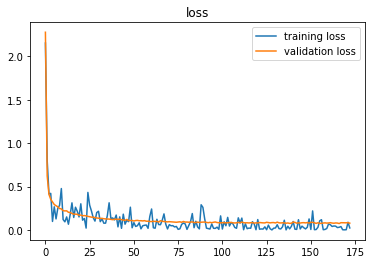

Plotting metrics...


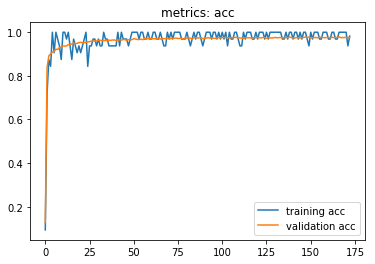

{'acc': 0.9758}


In [8]:
if try_cls2:
    teacher.plt_loss()
    teacher.plt_metrics()
    test_metric = teacher.get_metrics(X_test, y_test)
    print(test_metric)

In [9]:
if try_cls2:
    temperature = 1
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)

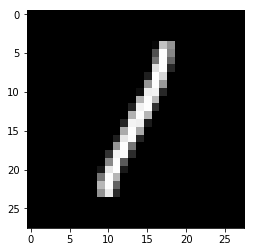

sample.max() 1.0
label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
teacher.predict [[0.000e+00 9.993e-01 4.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00
  1.000e-04 1.000e-04 0.000e+00]]
teacher.predict_softened [[0.000e+00 9.993e-01 4.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00
  1.000e-04 1.000e-04 0.000e+00]]
y_soft [0.000e+00 9.993e-01 4.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00
 1.000e-04 1.000e-04 0.000e+00]


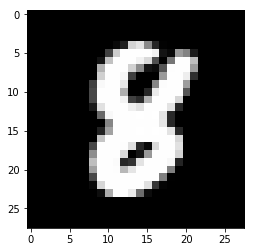

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
teacher.predict [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
teacher.predict_softened [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
y_soft [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


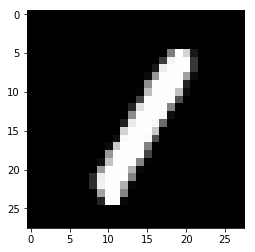

sample.max() 0.9960785
label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
teacher.predict [[0.000e+00 9.999e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e-04 0.000e+00 0.000e+00]]
teacher.predict_softened [[0.000e+00 9.999e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e-04 0.000e+00 0.000e+00]]
y_soft [0.000e+00 9.999e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e-04 0.000e+00 0.000e+00]


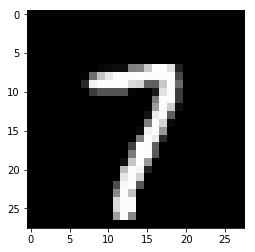

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
teacher.predict [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
teacher.predict_softened [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
y_soft [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


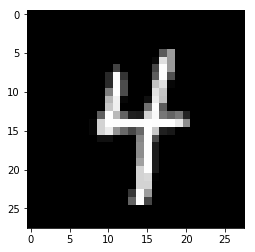

sample.max() 1.0
label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
teacher.predict [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
teacher.predict_softened [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y_soft [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


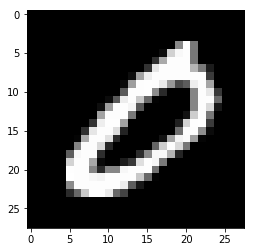

sample.max() 1.0
label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
teacher.predict [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
teacher.predict_softened [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_soft [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# plot and show sample
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    X_show = X_train
    n_data = X_show.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_show[[indices[i]]]
        label = y_train[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = teacher.predict(sample)
        pred_t = teacher.predict_softened(sample, temperature=temperature)
        pred_t2 = y_train_soft[indices[i]]
        print('sample.max()',sample.max())
        print('label',label)
        print('teacher.predict',np.round(pred,round_show))
        print('teacher.predict_softened',np.round(pred_t,round_show))
        print('y_soft',np.round(pred_t2,round_show))
        #     teacher.predict()

In [11]:
if try_cls2 and False:
    student = build_small_model(input_dims, output_dims, session, soften=False)
    student.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=20
        ,display_steps=100)

In [12]:
if try_cls2 and False:
    student.plt_loss()
    student.plt_metrics()
    test_metric = student.get_metrics(X_test, y_test)
    print(test_metric)

In [13]:
if try_cls2:
    X_train = X_train[:100]
    y_train = y_train[:100]
    y_train_soft = y_train_soft[:100]
    student = build_small_model(input_dims, output_dims, session, soften=True)
    student.soft_train(
        X=X_train
        ,y=y_train
        ,y_soft=y_train_soft
        ,temperature=temperature
        ,coef_softloss=1
        ,val_set=[X_val,y_val,y_val_soft]
        ,batch_size=None
        ,n_epochs=5000
        ,display_steps=100)
    # try original student
#     student = build_small_model(input_dims, output_dims, session, soften=False)
#     student.train(
#         X=X_train
#         ,y=y_train_soft
#         ,val_set=[X_val,y_val]
#         ,batch_size=32
#         ,n_epochs=2000
#         ,display_steps=100)

Epoch 1 , step 0 , loss= 2.3216314 val_loss= 2.3211682 , acc = 0.08 val acc = 0.0994 
Epoch 101 , step 0 , loss= 2.2826393 val_loss= 2.3141975 , acc = 0.05 val acc = 0.0766 
Epoch 201 , step 0 , loss= 2.297282 val_loss= 2.32943 , acc = 0.12 val acc = 0.096 
Epoch 301 , step 0 , loss= 2.2893968 val_loss= 2.327245 , acc = 0.09 val acc = 0.0882 
Epoch 401 , step 0 , loss= 2.2817345 val_loss= 2.3122213 , acc = 0.14 val acc = 0.111 
Epoch 501 , step 0 , loss= 2.2773626 val_loss= 2.3156328 , acc = 0.13 val acc = 0.1192 
Epoch 601 , step 0 , loss= 2.2849398 val_loss= 2.3222215 , acc = 0.13 val acc = 0.104 
Epoch 701 , step 0 , loss= 2.2785778 val_loss= 2.3230634 , acc = 0.12 val acc = 0.1038 
Epoch 801 , step 0 , loss= 2.280744 val_loss= 2.3257425 , acc = 0.12 val acc = 0.111 
Epoch 901 , step 0 , loss= 2.2846398 val_loss= 2.3205469 , acc = 0.13 val acc = 0.0976 
Epoch 1001 , step 0 , loss= 2.2891304 val_loss= 2.3221262 , acc = 0.13 val acc = 0.0956 
Epoch 1101 , step 0 , loss= 2.2854202 val_

Plotting loss...


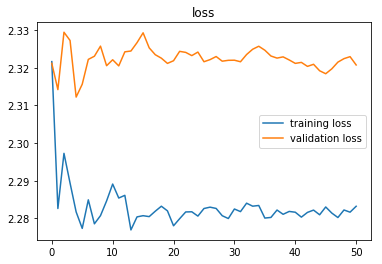

Plotting metrics...


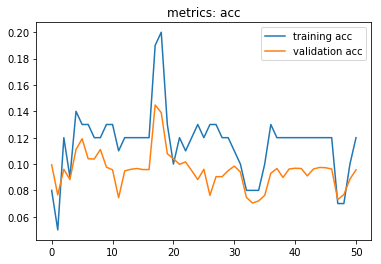

{'acc': 0.0983}


In [14]:
if try_cls2:
    student.plt_loss()
    student.plt_metrics()
    test_metric = student.get_metrics(X_test, y_test)
    print(test_metric)

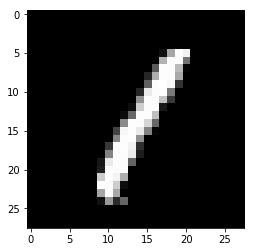

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.1219 0.1099 0.0559 0.1134 0.1113 0.0821 0.1205 0.0993 0.1048 0.0809]]
[[0.1219 0.1099 0.0559 0.1134 0.1113 0.0821 0.1205 0.0993 0.1048 0.0809]]


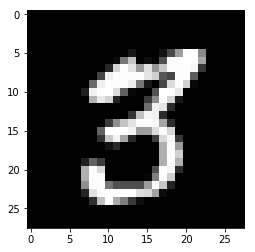

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[0.1213 0.11   0.0566 0.1136 0.1099 0.0828 0.1203 0.0993 0.1053 0.081 ]]
[[0.1213 0.11   0.0566 0.1136 0.1099 0.0828 0.1203 0.0993 0.1053 0.081 ]]


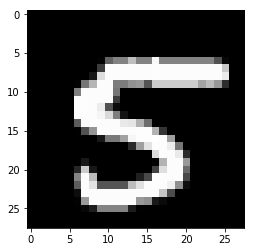

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.1219 0.1099 0.0559 0.1133 0.1114 0.0821 0.1205 0.0993 0.1047 0.0809]]
[[0.1219 0.1099 0.0559 0.1133 0.1114 0.0821 0.1205 0.0993 0.1047 0.0809]]


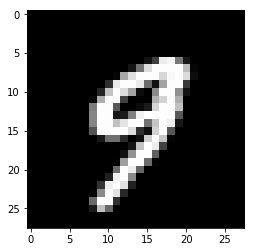

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[0.1219 0.1099 0.056  0.1134 0.1112 0.0821 0.1205 0.0993 0.1048 0.0809]]
[[0.1219 0.1099 0.056  0.1134 0.1112 0.0821 0.1205 0.0993 0.1048 0.0809]]


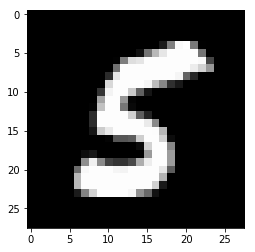

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.1214 0.1099 0.0565 0.1136 0.1102 0.0826 0.1203 0.0993 0.1052 0.081 ]]
[[0.1214 0.1099 0.0565 0.1136 0.1102 0.0826 0.1203 0.0993 0.1052 0.081 ]]


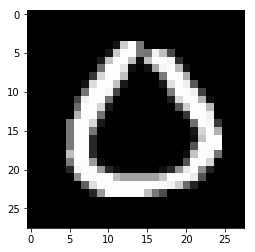

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.1211 0.11   0.0569 0.1137 0.1095 0.083  0.1202 0.0992 0.1054 0.081 ]]
[[0.1211 0.11   0.0569 0.1137 0.1095 0.083  0.1202 0.0992 0.1054 0.081 ]]


In [15]:
# plot and show sample
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    n_data = X_test.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_test[[indices[i]]]
        label = y_test[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = student.predict(sample)
        pred_t = student.predict_softened(sample, temperature=temperature)
        print(label)
        print(np.round(pred,round_show))
        print(np.round(pred_t,round_show))
#         print(np.round(pred_t2,round_show))
        #     student.predict()

In [16]:
# close_session(session)